In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
plt.rcParams["figure.figsize"] = (18,10)

In [80]:
df=pd.read_csv('datasets/twittes_dataset.csv',parse_dates=['created_at','user/created_at'], dayfirst=True)

In [81]:
df.shape

(16218, 21)

In [82]:
df.sample(3)

,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,id,reply_count,tweet_type,...,lang,url,user/created_at,user/description,user/favourites_count,user_followers_count,user_id,user/listed_count,user\name,user_verified
13499,9/26/2022 18:40,0,NaN,NaN,NaN,NaN,NaN,1.57E+18,NaN,retweet,...,fa,https://twitter.com/LabeGur/statuses/157452934...,2/4/2022 3:46,NaN,NaN,195,1.49E+18,NaN,LabeGur,NaN
3071,9/20/2022 19:51,0,NaN,NaN,NaN,NaN,NaN,1.57E+18,NaN,reply,...,fa,https://twitter.com/GAZISME7/statuses/15723730...,7/27/2020 10:02,NaN,NaN,274,1.29E+18,NaN,GAZISME7,NaN
694,9/19/2022 19:58,0,NaN,NaN,NaN,NaN,NaN,1.57E+18,NaN,reply,...,fa,https://twitter.com/kaameliiia/statuses/157201...,9/1/2022 6:01,NaN,NaN,232,1.57E+18,NaN,kaameliiia,NaN


In [83]:
df=df.drop(df.index[np.where(df['created_at']=='created_at')])

In [84]:
df.isnull().sum()

created_at                   0
favorite_count               0
full_text                15106
hashtags/0               15139
hashtags/1               15354
hashtags/2               15682
hashtags/3               16007
id                           0
reply_count              15106
tweet_type                1108
retweeted_user_id         1108
lang                      1108
url                          0
user/created_at              0
user/description         15369
user/favourites_count    15156
user_followers_count         0
user_id                      0
user/listed_count        15106
user\name                   10
user_verified            15099
dtype: int64

### How many of user account is verified

In [85]:
sorted_df_verifide_account=df.sort_values(['user_id','user_verified']).drop_duplicates('user_id',keep='last')

In [86]:
new_verifide_account=sorted_df_verifide_account.dropna(subset=['user_verified'])['user_verified']
new_verifide_account.value_counts(dropna=False)

FALSE    115
TRUE      43
1          5
Name: user_verified, dtype: int64

In [87]:
new_verifide_account=new_verifide_account.replace(['FALSE','TRUE','1','user/verified'],[0,1,1,0])
new_verifide_account=new_verifide_account.value_counts()
new_verifide_account.to_csv("datasets/new_verifide_account.csv", index=False)
new_verifide_account

0    115
1     48
Name: user_verified, dtype: int64

Text(0, 0.5, 'Count of users')

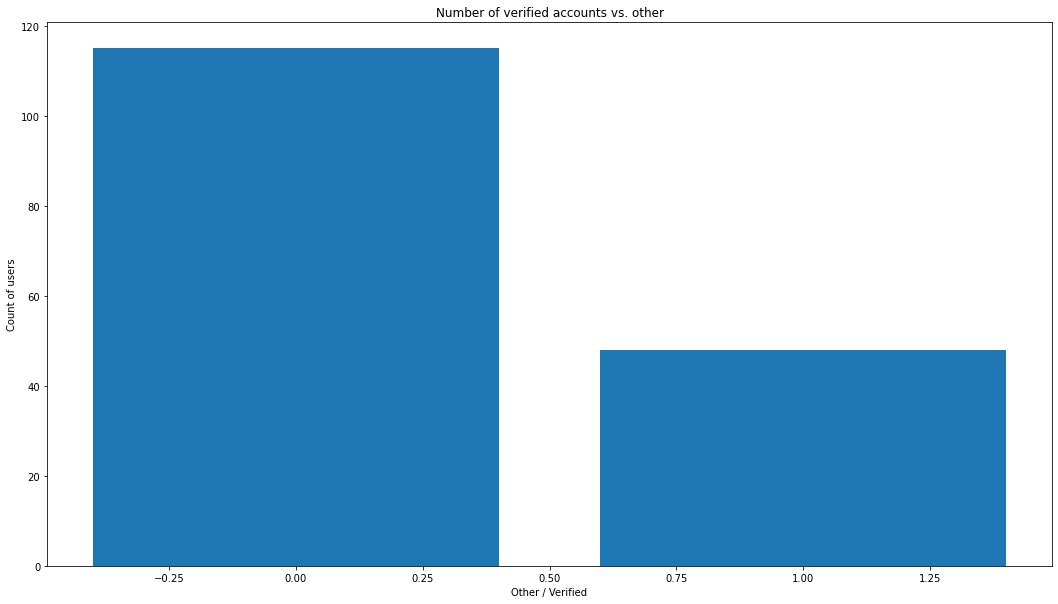

In [88]:
plt.bar(new_verifide_account.index,new_verifide_account.values)
plt.title("Number of verified accounts vs. other")
plt.xlabel("Other / Verified")
plt.ylabel("Count of users")

## Find male or female

In [89]:
from names_dataset import NameDataset, NameWrapper
nd = NameDataset()

In [90]:
print(NameWrapper(nd.search('Sarah')).describe)

Female, United Kingdom


In [91]:
def genderIdentifier(name):
    m = 0
    f = 0
    if(isinstance(name, str)):
        for i in range(1,len(name)+1):
            for j in range(i+1,len(name)+1):
                x = NameWrapper(nd.search(name[int(i):int(j)])).describe
                gender=x.split(',')[0]

                if gender == 'Female':
                    f += 1
                elif gender == 'Male':
                    m += 1
                else:
                    continue
        if m > f:
            return 'Male'
        elif f > m:
            return 'Female'
        else:
            return np.NaN
    else:
        return np.NaN

In [92]:
df['gender']=df['user\\name'].apply(lambda x: genderIdentifier(x))

In [93]:
df['gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [94]:
df.columns

Index(['created_at', 'favorite_count', 'full_text', 'hashtags/0', 'hashtags/1',
       'hashtags/2', 'hashtags/3', 'id', 'reply_count', 'tweet_type',
       'retweeted_user_id', 'lang', 'url', 'user/created_at',
       'user/description', 'user/favourites_count', 'user_followers_count',
       'user_id', 'user/listed_count', 'user\name', 'user_verified', 'gender'],
      dtype='object')

In [95]:
df[['created_at','user/created_at']]

,created_at,user/created_at
0,9/19/2022 19:59,4/3/2020 9:34
1,9/19/2022 19:59,12/30/2016 17:43
2,9/19/2022 19:59,9/18/2022 16:12
3,9/19/2022 19:59,7/10/2022 16:54
4,9/19/2022 19:59,4/20/2013 22:52
...,...,...
16213,2022-09-23T23:59:49.000Z,2020-05-12T22:23:31.000Z
16214,2022-09-23T23:59:45.000Z,2013-02-18T09:32:07.000Z
16215,2022-09-23T23:59:46.000Z,2018-07-27T16:24:15.000Z
16216,2022-09-23T23:59:45.000Z,2020-04-03T19:47:30.000Z


In [96]:
dt.datetime.strptime('2022-09-23T23:59:47.000Z', "%Y-%m-%dT%H:%M:%S.%fZ")

datetime.datetime(2022, 9, 23, 23, 59, 47)

In [97]:
def f(x):
    indx=np.where(df['created_at']==x)[0][0]
    if (indx>=15106):
      return dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ")
    if(indx<15106):
       return dt.datetime.strptime(x, '%m/%d/%Y %H:%M') 

In [98]:
def f2(x):
    indx=np.where(df['user/created_at']==x)[0][0]
    if (indx>=15106):
      return dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ")
    if(indx<15106):
       return dt.datetime.strptime(x, '%m/%d/%Y %H:%M') 
    # return dt.datetime(pd.Timestamp(x).date().year, pd.Timestamp(x).date().month, 1)

In [99]:
df['created_at']=df['created_at'].apply(lambda x:f(x))
df['user/created_at']=df['user/created_at'].apply(lambda x:f2(x))

In [100]:
df.to_csv("datasets/clean_dataset.csv", index=False)

In [101]:
mask=(df['user/created_at']>'2022-07-1') & (df['user/created_at']<'2022-10-1')

In [102]:
df_=df.loc[mask]

In [103]:
df_.to_csv("datasets/mask.csv", index=False)

In [104]:
percentage_signup=round((df_.shape[0])/(df.shape[0])*100 ,2)
percentage_signup

17.3

### accourding to the above result 17.3% of people sign up to twiter after increase amount of tweets with Mahsa Amini hashtag 

In [105]:
sorted_df=df.sort_values(['user_id','gender']).drop_duplicates('user_id',keep='last')
sorted=sorted_df['gender'].dropna()
# sorted=sorted[(sorted=='male')|(sorted=='female')]
gender_user=sorted.value_counts()

In [106]:
sorted.to_csv("datasets/gender.csv", index=False)

Text(0, 0.5, 'Count of users')

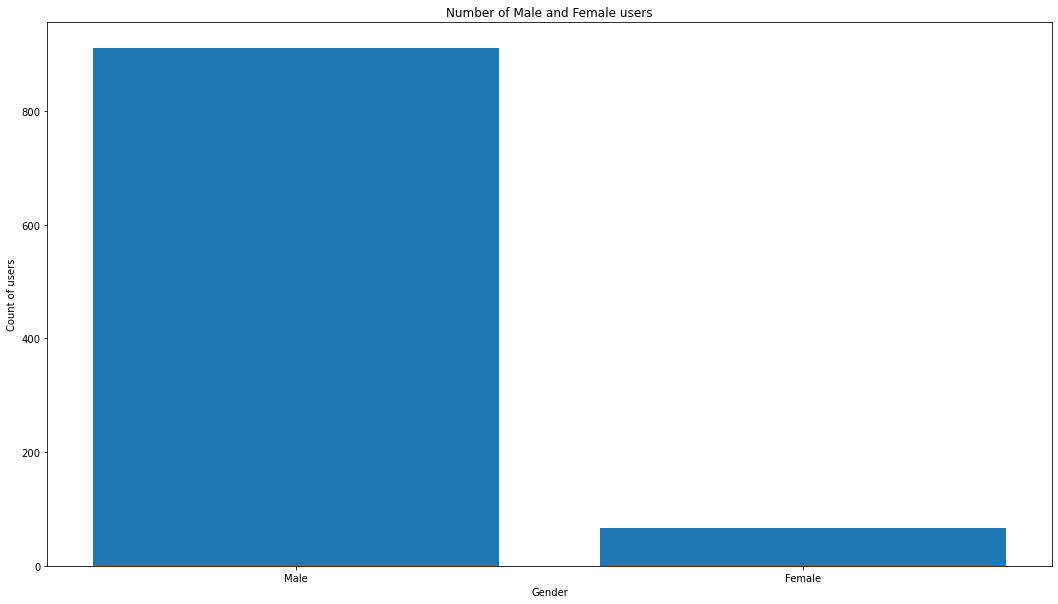

In [107]:
plt.bar(gender_user.index,gender_user.values)
plt.title("Number of Male and Female users")
plt.xlabel("Gender")
plt.ylabel("Count of users")

In [108]:
def find_jurnalist(x):
    if (type(x) is str ):
        arr=x.split()
        for i in arr:
            if(i=='Journalist'):
               return 'Journalist'
            else:
                return x   
    else:
        return x           

df['user_journalist']=df['user/description'].apply(lambda x: find_jurnalist(x))

In [109]:
df['user_journalist']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
16213                                                  NaN
16214                              You just get Rock to me
16215    ‏باز هم می کشند اگر ما یکی نشویم و شرایط را ‎#...
16216                                     زن، زندگی، آزادی
16217                                                  NaN
Name: user_journalist, Length: 16214, dtype: object

In [110]:
def get_month(x):
    return dt.datetime(x.year, x.month, x.day) 

In [111]:
df['new_created_at']=df['created_at'].apply(get_month)

In [112]:
sorted_bytime_df=df.sort_values(['new_created_at'])

In [113]:
test_date1 = df['created_at'].min()
test_date2 = df['created_at'].max()
N = 4
temp = []
diff = ( test_date2 - test_date1) // N
for idx in range(0, N+1):
    
    temp.append((test_date1 + idx * diff))

res=[]
for sub in temp:
    res.append(sub.strftime("%Y-%m-%d"))  
res     

['2022-09-19', '2022-09-29', '2022-10-08', '2022-10-18', '2022-10-27']

In [114]:
df_for_time={'time':[],
'Journalist':[],
'other':[]
}

In [115]:
for idx, x in enumerate(res):   
    if((idx+1)<len(res)):
        mask=(df['created_at']>res[idx]) & (df['created_at']<res[idx+1])
        df_for_time['time'].append(f'{res[idx]} to {res[idx+1]}')
        dfm=df.loc[mask]
        number_of_journalists=dfm[dfm['user_journalist']=='Journalist'].shape[0]
        number_of_other=dfm[dfm['user_journalist']!='Journalist'].shape[0]
        df_for_time['Journalist'].append(number_of_journalists)
        df_for_time['other'].append(number_of_other)


In [116]:
dfn=pd.DataFrame(data=df_for_time)
dfn.to_csv("dashboard/data/journalist.csv", index=False)
dfn

,time,Journalist,other
0,2022-09-19 to 2022-09-29,0,15256
1,2022-09-29 to 2022-10-08,0,51
2,2022-10-08 to 2022-10-18,0,0
3,2022-10-18 to 2022-10-27,17,880


Text(0.5, 1.0, 'Number of journalist vs. other')

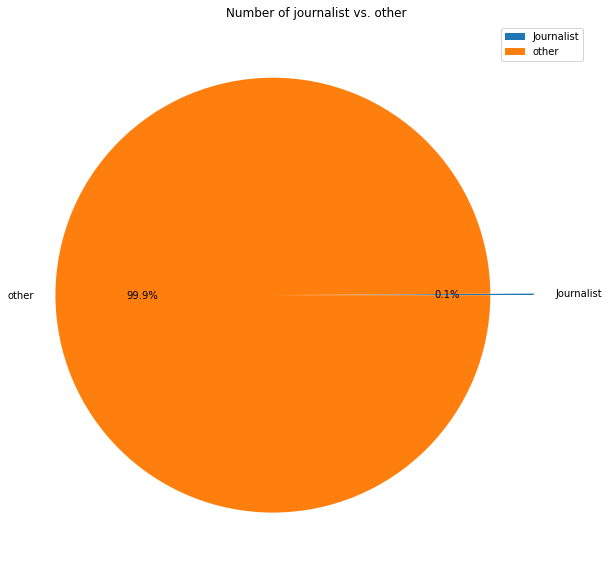

In [117]:
plt.pie([dfn['Journalist'].sum(), dfn['other'].sum()], 
        labels=['Journalist', 'other'],
        explode = [0, 0.2],
        autopct='%1.1f%%')

plt.legend()
plt.title("Number of journalist vs. other")

Text(0, 0.5, 'Count')

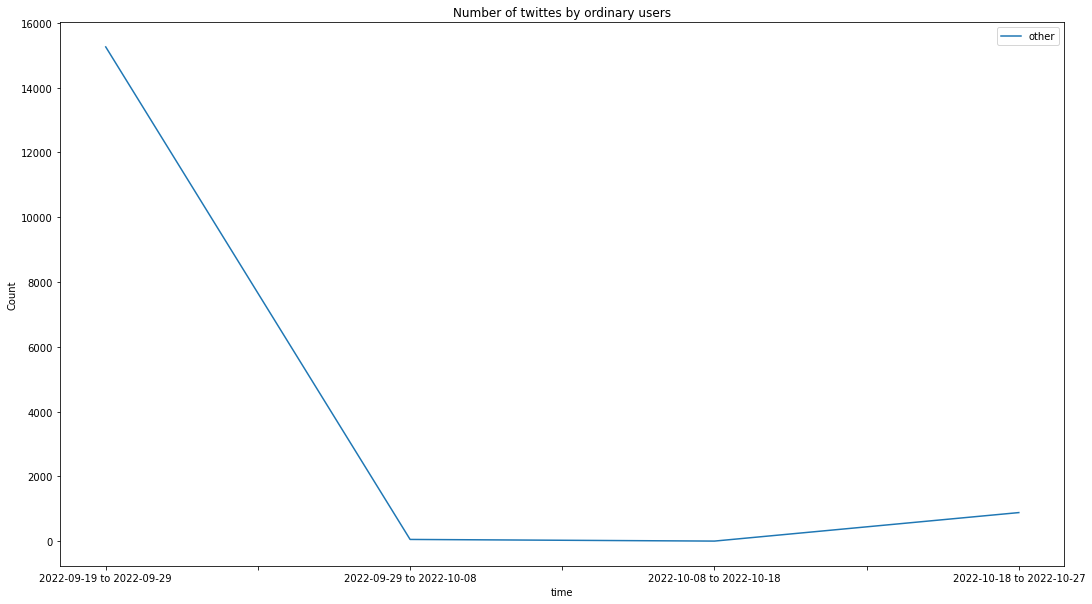

In [118]:
dfn.plot(x="time", y="other", kind="line")
plt.title("Number of twittes by ordinary users")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

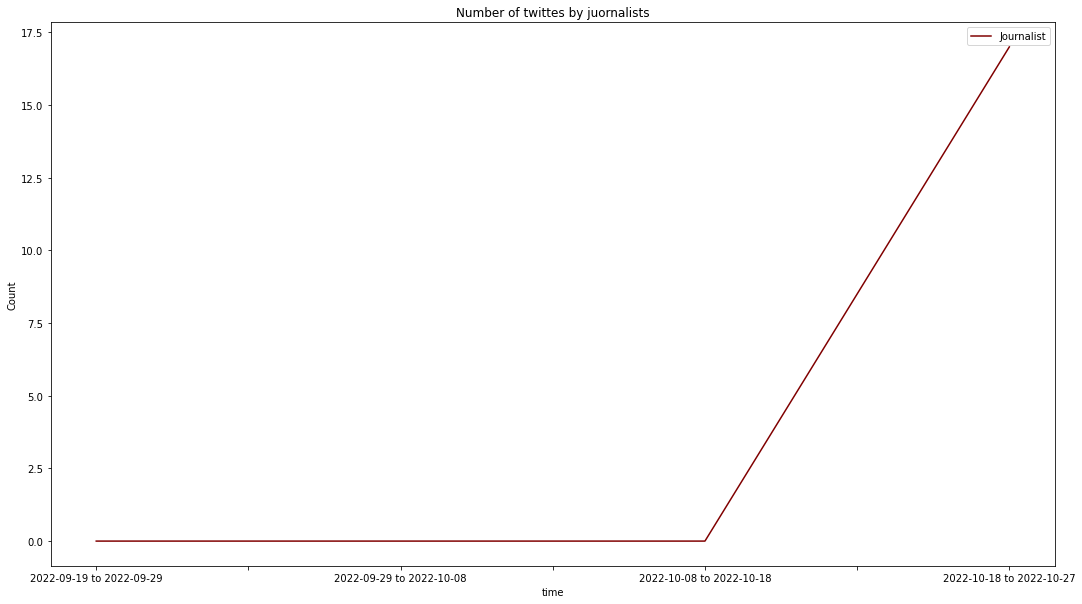

In [119]:
dfn.plot(x="time", y="Journalist", kind="line",color="maroon")
plt.title("Number of twittes by juornalists")
plt.ylabel("Count")

In [120]:
lang=df['lang'].dropna()
lang_=lang.value_counts()

Text(0, 0.5, 'Count')

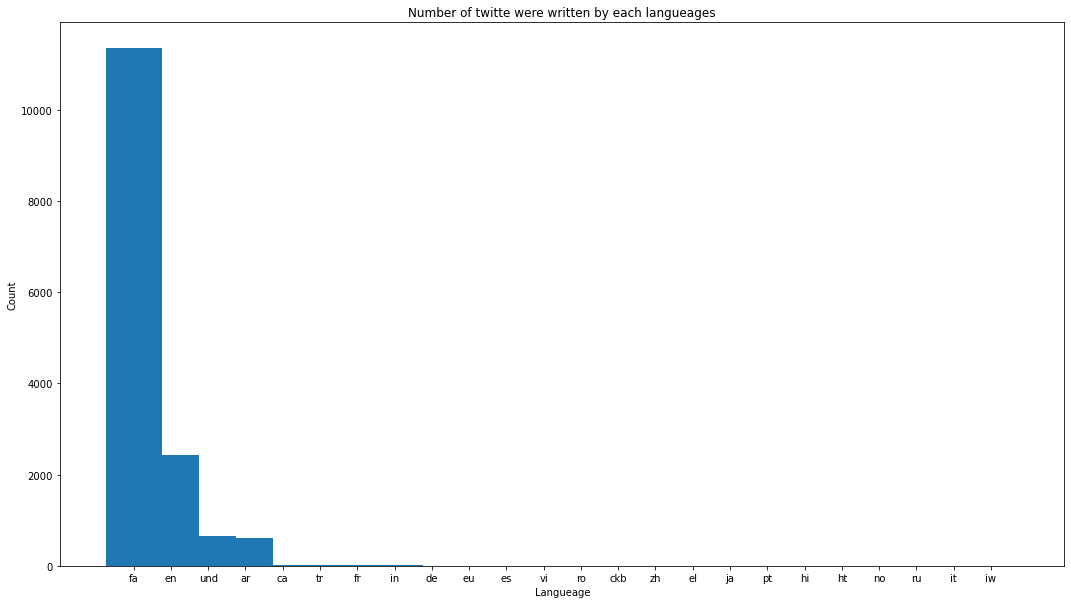

In [121]:
plt.bar(lang_.index,lang_.values,width = 1.5)
plt.title("Number of twitte were written by each langueages")
plt.xlabel("Langueage")
plt.ylabel("Count")